In [ ]:
import zipfile

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/job_fake_or_real.zip'

# Path to extract the contents
extract_folder = '/content/drive/MyDrive/job/dataset/'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"File unzipped successfully to {extract_folder}")


File unzipped successfully to /content/drive/MyDrive/job/dataset/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# Path to the unzipped CSV file (adjust if necessary)
file_path = '/content/drive/MyDrive/job/dataset/fake_job_postings.csv'
# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [ ]:
# Show the shape of the dataset
print("Shape of dataset:", df.shape)


Shape of dataset: (17880, 18)


In [ ]:
# Check column data types and non-null counts
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 1

In [ ]:
# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
             job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [ ]:
# Check the distribution of the target column
print("\nFraudulent Job Counts:")
print(df['fraudulent'].value_counts())



Fraudulent Job Counts:
fraudulent
0    17014
1      866
Name: count, dtype: int64


<ipython-input-14-b9b7c0458d6e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraudulent', data=df, palette='Set2')


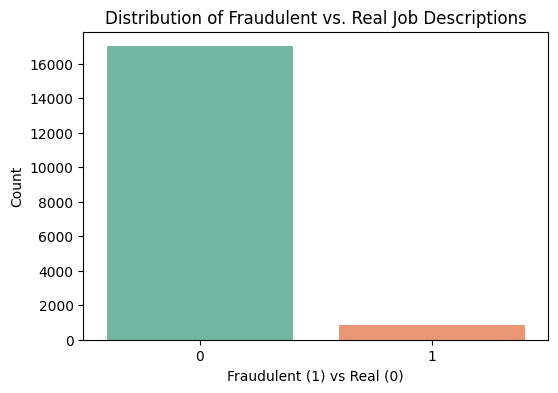

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of fraudulent job descriptions
plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=df, palette='Set2')

# Adding labels and title
plt.title('Distribution of Fraudulent vs. Real Job Descriptions')
plt.xlabel('Fraudulent (1) vs Real (0)')
plt.ylabel('Count')

# Display the plot
plt.show()


In [ ]:
df.drop(columns= ['job_id', 'salary_range'], inplace= True)

In [ ]:
df.fillna(" ",inplace = True)

In [ ]:
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function']

In [ ]:
df = df[["text", "telecommuting", "has_company_logo", "has_questions", "fraudulent"]]

In [ ]:
df.head()


text  telecommuting  \
0  Marketing Intern US, NY, New York Marketing We...              0   
1  Customer Service - Cloud Video Production NZ, ...              0   
2  Commissioning Machinery Assistant (CMA) US, IA...              0   
3  Account Executive - Washington DC US, DC, Wash...              0   
4  Bill Review Manager US, FL, Fort Worth   SpotS...              0   

   has_company_logo  has_questions  fraudulent  
0                 1              0           0  
1                 1              0           0  
2                 1              0           0  
3                 1              0           0  
4                 1              1           0

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already done
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(f"[{string.punctuation}]", " ", text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the tokens back into a string
    cleaned_text = " ".join(tokens)

    return cleaned_text

# Apply the preprocessing function to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display the first few rows of the cleaned text
print(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                text  \
0  Marketing Intern US, NY, New York Marketing We...   
1  Customer Service - Cloud Video Production NZ, ...   
2  Commissioning Machinery Assistant (CMA) US, IA...   
3  Account Executive - Washington DC US, DC, Wash...   
4  Bill Review Manager US, FL, Fort Worth   SpotS...   

                                        cleaned_text  
0  marketing intern u ny new york marketing food5...  
1  customer service cloud video production nz auc...  
2  commissioning machinery assistant cma u ia wev...  
3  account executive washington dc u dc washingto...  
4  bill review manager u fl fort worth spotsource...  


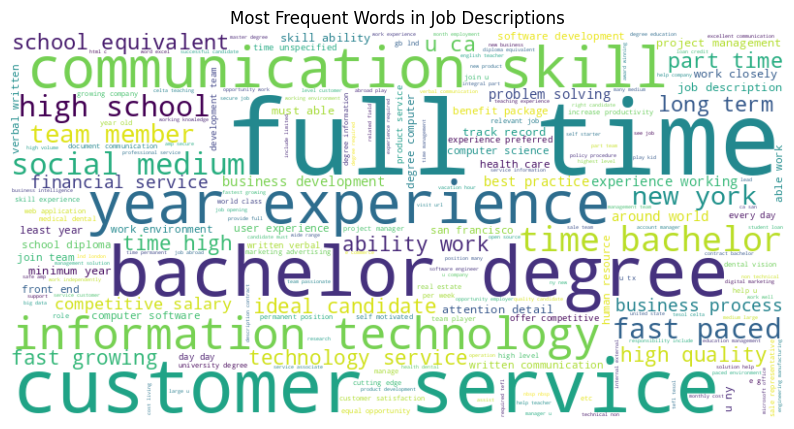

In [ ]:
from wordcloud import WordCloud

# Combine all the cleaned text into one large string
all_text = ' '.join(df['cleaned_text'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Job Descriptions')
plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_text'])

# Convert the text to sequences of integers
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])

# Pad the sequences to ensure uniform length
max_len = 100  # You can adjust this based on your dataset
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')


In [ ]:
# Check the first few sequences
print(padded_sequences[:5])

[[   25   875    10   557    17   381    25  2748   886  3520   601   872
   2545   182    40  1228  3823   128  2460   517   756    49    61   338
    201  1747     9    77     3   432   114    19   448    17   427   131
   1228    29   197   438   395   523    74  3096   150  3444    53   395
   2545  2286   281   128  2460  2674   379    75  2741    56  1496    54
     83  6517  6604  6449  6450  6451  6605   547  1304   395   100  4586
    520  2748  2120    68   395   146  4522  5498  1114  6606  3190    17
    381     7  6452  6607   265  4393   460   792   413  5302    17   381
    346  2748    91    79]
 [    8     5   516   366   170  1539  1034   164   706  1123    57   516
    366   170     5   706  1123    57   516   366   170     5  1930   102
    157    88    32    60   108   366   166  3133  2954  1094    57   706
   1123    72   366   170    91  1829  1061  3577   516  1410  2741  1715
    706    44  5711   706  1123  3774  3380   224   761  1638   255    22
    737   3

In [ ]:
import tensorflow as tf

# Define the embedding layer
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token
embedding_dim = 100  # You can adjust the embedding size as needed

embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)

# Generate the word embeddings for each job description
word_embeddings = embedding_layer(padded_sequences)

# Convert the embeddings into a numpy array for further use
word_embeddings = word_embeddings.numpy()

# Display the embeddings for the first job description
print(word_embeddings[0])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[[-0.03616405 -0.04307249 -0.0383537  ...  0.04586652  0.00325221
   0.00264999]
 [ 0.03639933  0.00186586  0.04353727 ...  0.02377911  0.04206106
  -0.00912501]
 [-0.00176607 -0.0366329  -0.00831985 ... -0.02464833 -0.02080175
   0.01244472]
 ...
 [ 0.01886273 -0.02106461 -0.01179644 ... -0.01344595  0.02536727
   0.04662243]
 [-0.01981125 -0.00878752  0.00632024 ... -0.04983222  0.03438834
  -0.00824531]
 [ 0.01767908 -0.03897599 -0.03463119 ...  0.04007987  0.01458004
   0.01211039]]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['fraudulent'], test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (14304, 100)
Test data shape: (3576, 100)


In [ ]:
import tensorflow as tf

# Define a simple LSTM model
model = Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len), # Embedding layer added inside the model
    LSTM(128, return_sequences=True),  # input_shape is automatically inferred
    Dropout(0.2),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification (fraudulent or not)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with padded sequences as input
history = model.fit(padded_sequences,  # Use padded_sequences instead of word_embeddings
          df['fraudulent'],
          epochs=10,
          batch_size=32,
          callbacks=[early_stopping],
          validation_split=0.2)

# Save the model
model.save('my_lstm_model.keras')

Epoch 1/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9572 - loss: 0.2032 - val_accuracy: 0.9041 - val_loss: 0.3153
Epoch 2/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9705 - loss: 0.1124 - val_accuracy: 0.9139 - val_loss: 0.2889
Epoch 3/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9803 - loss: 0.0624 - val_accuracy: 0.9169 - val_loss: 0.2673
Epoch 4/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9894 - loss: 0.0380 - val_accuracy: 0.9158 - val_loss: 0.2770
Epoch 5/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9959 - loss: 0.0158 - val_accuracy: 0.9130 - val_loss: 0.2924
Epoch 6/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9957 - loss: 0.0174 - val_accuracy: 0.9231 - val_loss: 0.3918


In [ ]:
# Evaluate the model's performance on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9735 - loss: 0.0866
Test Loss: 0.0845
Test Accuracy: 0.9754


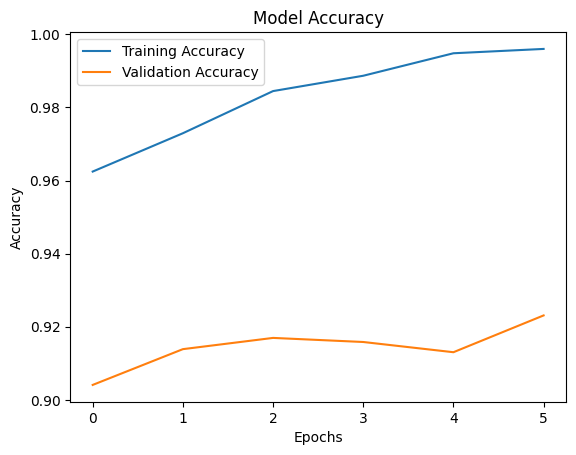

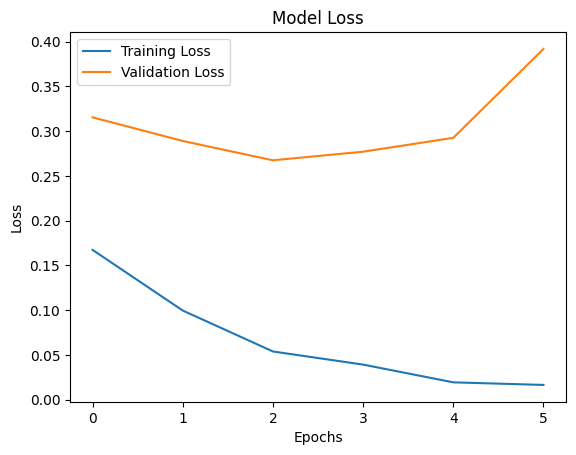

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3395
           1       0.85      0.62      0.72       181

    accuracy                           0.98      3576
   macro avg       0.92      0.81      0.85      3576
weighted avg       0.97      0.98      0.97      3576



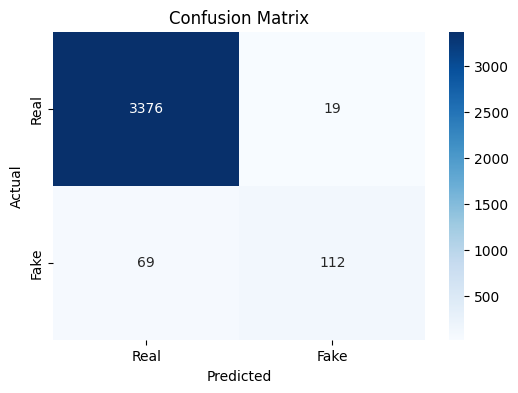

Test Accuracy: 0.9754


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Evaluation report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Accuracy score
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")


In [ ]:
# Save the model for later use
model.save("fake_job_lstm_model.h5")


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example new job description
new_job = "Looking for data analyst with strong SQL skills and 2 years experience in analytics."

# Tokenize and pad
new_seq = tokenizer.texts_to_sequences([new_job])
new_padded = pad_sequences(new_seq, maxlen=max_len)

# Predict
prediction = model.predict(new_padded)[0][0]
print("Fake" if prediction > 0.5 else "Real", f"(Confidence: {prediction:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Real (Confidence: 0.00)


In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9fd0d74f648090117639c5d1fe7add82e7b93cfa8195c30b43c27808de64def1
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_text
from sklearn.pipeline import make_pipeline

# Use a simpler version of your model for LIME explanation (LSTM is hard to interpret with LIME)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Train simple model for explanation
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['cleaned_text'])
log_reg_model = LogisticRegression()
log_reg_model.fit(X_tfidf, df['fraudulent'])

# LIME explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=['Real', 'Fake'])

# Choose an index to explain
idx = 10

# ***CHANGE***: Transform the text instance using the vectorizer before passing to explain_instance
instance_to_explain = df['cleaned_text'].iloc[idx]
instance_tfidf = vectorizer.transform([instance_to_explain])

# Get the prediction probabilities for the instance
exp = explainer.explain_instance(instance_to_explain,
                                 classifier_fn=lambda x: log_reg_model.predict_proba(vectorizer.transform(x)), # ***CHANGE***: Use a lambda function to transform the input before prediction
                                 num_features=10)

# Visualize explanation
exp.show_in_notebook(text=True)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example of a new job description
new_job_description = "Looking for an experienced data scientist with expertise in machine learning and AI, willing to work remotely."

# Step 1: Tokenize the new job description
new_job_seq = tokenizer.texts_to_sequences([new_job_description])

# Step 2: Pad the sequence to match the input shape of the LSTM
new_job_padded = pad_sequences(new_job_seq, maxlen=X_train.shape[1])

# Step 3: Make a prediction using the trained LSTM model
prediction = model.predict(new_job_padded)[0][0]

# Step 4: Output the prediction (Real or Fake)
if prediction > 0.5:
    print("The job description is Fake (Confidence: {:.2f})".format(prediction))
else:
    print("The job description is Real (Confidence: {:.2f})".format(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The job description is Real (Confidence: 0.01)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
The job description is Real (Confidence: 0.01)


In [ ]:
from lime.lime_text import LimeTextExplainer

# Create an explainer
explainer = LimeTextExplainer(class_names=['Real', 'Fake'])

# Define the prediction function for LIME
def lstm_predict_proba(texts):
    seqs = tokenizer.texts_to_sequences(texts)
    pads = pad_sequences(seqs, maxlen=X_train.shape[1])
    probs = model.predict(pads)
    return np.hstack([1 - probs, probs])

# Explain the prediction for the fake job description
exp = explainer.explain_instance(new_job_description, lstm_predict_proba, num_features=10)
exp.show_in_notebook(text=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
